In [1]:
import pandas as pd
df = pd.read_csv("Doc\\ipodata.csv")
df.head()

,Code,Name,Date,Price,Share,Amount,Warran,Underwriter,Sector,Subsector,Field,Website,Prospectus,Summary_Prospectus,Alamat,Image,Papan Pencatatan
0,GUNA,PT. Gunanusa Eramandiri Tbk.,09 Jul 2024,Rp150,20%,"5,000,000 lot",0,GR - PANIN SEKURITAS TBK.,Barang Konsumen Primer,Makanan & Minuman,Industri makanan dari kedele dan kacang-kacang...,https://www.gunanusaeramandiri.com,https://storage.googleapis.com/assets.trading....,https://storage.googleapis.com/assets.trading....,Kawasan Industri BIIE Hyundai Jl. Inti I Kav. ...,https://storage.googleapis.com/assets.trading....,Pengembangan
1,GOLF,PT Intra GolfLink Resorts Tbk,08 Jul 2024,Rp200,15.02%,"31,000,000 lot",0,IF - SAMUEL SEKURITAS INDONESIA,Barang Konsumen Non-Primer,Barang Rekreasi,Bergerak Dalam Bidang Jasa Konsultasi Manajeme...,https://www.golflinkresorts.co.id/id,https://storage.googleapis.com/assets.trading....,https://storage.googleapis.com/assets.trading....,"Desa Kadumanggu, Kecamatan Madang Bogor 16810 ...",https://storage.googleapis.com/assets.trading....,Utama
2,LABS,PT UBC Medical Indonesia Tbk,10 Jul 2024,Rp102,17.72%,"7,000,000 lot",0,YJ - LOTUS ANDALAN SEKURITAS,Kesehatan,Jasa & Peralatan Kesehatan,Distributor Alat Kesehatan,https://www.ubcindonesia.com,https://storage.googleapis.com/assets.trading....,https://storage.googleapis.com/assets.trading....,"Kawasan Industri Pulogadung, Jl. Rawagelam V, ...",https://storage.googleapis.com/assets.trading....,Pengembangan
3,ISEA,PT Indo American Seafoods Tbk,08 Jul 2024,Rp250,20.86%,"2,900,000 lot",2 : 1,CP - VALBURY SEKURITAS INDONESIA,Barang Konsumen Primer,Makanan & Minuman,"Industri Pembekuan Biota Air Lainnya, Industri...",https://www.indoamericanseafoods.com/,https://storage.googleapis.com/assets.trading....,https://storage.googleapis.com/assets.trading....,"Jl. Ir. Sutami KM 13, Desa Sukanegara, Kecamat...",https://storage.googleapis.com/assets.trading....,Pengembangan
4,PART,PT Cipta Perdana Lancar,05 Jul 2024,Rp105,25%,"6,800,000 lot",1 : 1,EP - MNC SEKURITAS,Barang Konsumen Non-Primer,Otomotif & Komponen Otomotif,Perseroan bergerak di bidang Manufaktur Kompon...,https://www.ciptaperdanalancar.com,https://storage.googleapis.com/assets.trading....,https://storage.googleapis.com/assets.trading....,"Jl. Prabu Siliwangi KM 0,5 Keroncong, Kec. Jat...",https://storage.googleapis.com/assets.trading....,Pengembangan


In [2]:
df["Price"] = df["Price"].str.replace("Rp","").astype(int)
prices = df["Price"]
df["Share"] = df["Share"].str.replace("%","").astype(float)
df["Warran"] = df['Warran'].apply(lambda x: int(x.split(":")[0])/int(x.split(":")[1]) if x != "0" else int(x) )
df["Underwriter"] = df["Underwriter"].apply(lambda x:x.split("-")[0])
df["Amount"] = df["Amount"].str.replace(",","")
df["Amount"] = df["Amount"].str.replace("lot","")
df["Amount"] = df["Amount"].apply(lambda x:int(x))

In [3]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
encoder = LabelEncoder()
# Encode each column
for column in ["Papan Pencatatan","Underwriter","Sector","Subsector"]:
    df[column] = encoder.fit_transform(df[column])

In [4]:
feature_enginering = ["Papan Pencatatan","Share","Underwriter","Warran","Sector","Subsector","Price","Amount"]

In [5]:
x = df[feature_enginering]

In [6]:
target = pd.read_csv("Doc//ipo_gain.csv")
target.head()

,1 candle gain,2 candle gain,3 candle gain,4 candle gain,5 candle gain,1 candle high,2 candle high,3 candle high,4 candle high,5 candle high
0,34.666667,68.000000,109.333333,98.666667,94.666667,34.666667,68.000000,109.333333,161.333333,116.000000
1,35.000000,36.000000,20.000000,20.000000,15.000000,35.000000,51.000000,38.000000,31.000000,21.000000
2,34.313725,80.392157,92.156863,66.666667,76.470588,34.313725,80.392157,123.529412,109.803922,88.235294
3,24.800000,28.000000,52.000000,87.200000,40.800000,24.800000,40.000000,52.000000,88.000000,98.400000
4,24.761905,4.761905,10.476190,16.190476,22.857143,34.285714,28.571429,19.047619,18.095238,22.857143


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


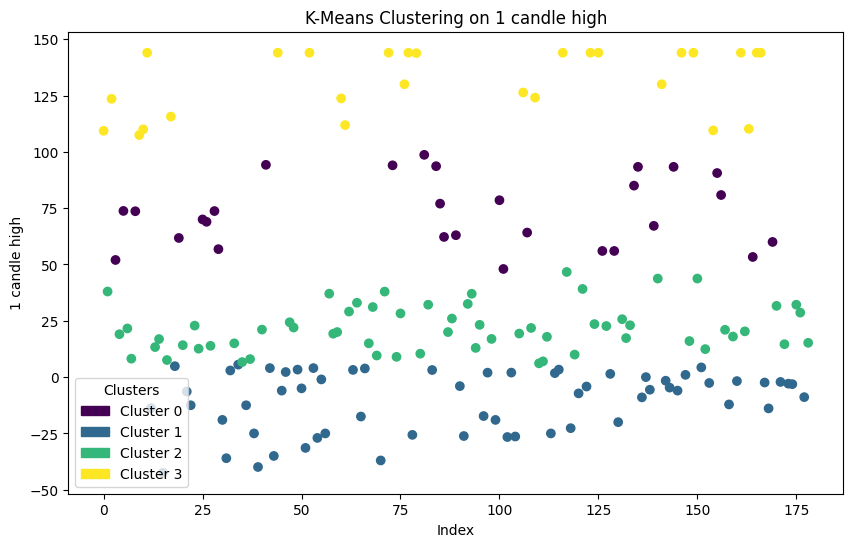

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming the data is in a Series
data_series = target['3 candle high']

# Reshape the data for K-Means
data_reshaped = data_series.values.reshape(-1, 1)

# Specify the number of clusters
kmeans = KMeans(n_clusters=4)

# Fit the model to your data
kmeans.fit(data_reshaped)

# Get the cluster labels
df['Cluster'] = kmeans.labels_

# To visualize the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(range(len(data_series)), data_series, c=df['Cluster'], cmap='viridis')

# Create legend handles
handles = []
for cluster in range(kmeans.n_clusters):
    handles.append(mpatches.Patch(color=scatter.cmap(scatter.norm(cluster)), label=f'Cluster {cluster}'))

# Add the legend
plt.legend(handles=handles, title='Clusters')

plt.xlabel('Index')
plt.ylabel('1 candle high')
plt.title(f'K-Means Clustering on {}')
plt.show()


In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import joblib

In [9]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Suppress specific warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

In [14]:
def predict(label):
    y = df[label]
    X = df[feature_enginering]
    attemp = label + "4" +"3"

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the models and their hyperparameters for tuning
    models = {
        'LogisticRegression': (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10]}),
        'DecisionTree': (DecisionTreeClassifier(), {'max_depth': [3, 5, 10]}),
        'RandomForest': (RandomForestClassifier(), {'n_estimators': [50, 100], 'max_depth': [3, 5, 10]}),
        'SVC': (SVC(), {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}),
        'XGBClassifier': (XGBClassifier(), {'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'n_estimators': [50, 100]})
        }

    # Initialize variables to store the best model
    best_f1 = 0
    best_model = None
    best_model_name = ""
    results_list = []

    # Use the standard scorers in GridSearchCV
    skf = StratifiedKFold(n_splits=5)

    # Use the stratified k-folds in GridSearchCV
    for model_name, (model_class, params) in models.items():
        model = model_class.__class__()
        grid_search = GridSearchCV(model, params, cv=skf, scoring='f1_macro')
        grid_search.fit(X_train, y_train)
        
        best_model_instance = grid_search.best_estimator_
        y_pred = best_model_instance.predict(X_test)
            
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        results_list.append({
                'Model': model_name,
                'BestParams': grid_search.best_params_,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1 Score': f1
            })

            # Save the best model based on F1 Score
        if f1 > best_f1:
                best_f1 = f1
                best_model = best_model_instance
                best_model_name = model_name

        # Convert results list to a DataFrame
    results = pd.DataFrame(results_list)
        # Save all model results to a CSV file
    results.to_csv(f'Doc//{attemp}_model_results.csv', index=False)
        # Save the best model to a file
    joblib.dump(best_model, f'Doc//{attemp}_best_model.pkl')
    print(f"All model results saved to 'Doc//{attemp}_model_results.csv'.")
    print(f"Best model ({best_model_name}) saved to 'Doc//{attemp}_best_model.pkl' with F1 Score: {best_f1}")

    # Load the best model from the file
    best_model = joblib.load(f'Doc//{attemp}_best_model.pkl')
    X = df[feature_enginering]
    y = y
        # Make predictions using the best model
    y_pred = best_model.predict(X)
        
        # Calculate and print overall metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='macro')
    recall = recall_score(y, y_pred, average='macro')
    f1 = f1_score(y, y_pred, average='macro')
    print(f"Overall Accuracy: {accuracy}")
    print(f"Overall Precision: {precision}")
    print(f"Overall Recall: {recall}")
    print(f"Overall F1 Score: {f1}")
        
        # Generate a classification report
    print(classification_report(y, y_pred))
        
        # Generate a confusion matrix
    conf_matrix = confusion_matrix(y, y_pred)
    print(conf_matrix)
        
        # Save errors to CSV
    errors = pd.DataFrame({
            'Actual': y,
            'Predicted': y_pred
        })

    errors.insert(0, 'Code', df['Code'])
    errors.to_csv(f"Doc//{attemp}_error.csv", index=False)
    print("\n")

In [15]:
predict("Cluster")

All model results saved to 'Doc//Cluster43_model_results.csv'.
Best model (RandomForest) saved to 'Doc//Cluster43_best_model.pkl' with F1 Score: 0.3373655913978495
Overall Accuracy: 0.888268156424581
Overall Precision: 0.9053169053169053
Overall Recall: 0.8788615804744837
Overall F1 Score: 0.8904066128447026
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        28
           1       0.87      0.89      0.88        62
           2       0.86      0.92      0.89        62
           3       0.88      0.85      0.87        27

    accuracy                           0.89       179
   macro avg       0.91      0.88      0.89       179
weighted avg       0.89      0.89      0.89       179

[[24  1  2  1]
 [ 0 55  6  1]
 [ 0  4 57  1]
 [ 0  3  1 23]]


